In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob
from matplotlib import pyplot as plt

In [49]:
TIME_START_LEN = len("The elapsed time is ")

def get_time(filename):
    with open(filename, 'r') as f:
        for line in f:
            pass
        last_line = line
    try:
        time_str = last_line[TIME_START_LEN:last_line.rfind(' ')]
        time = float(time_str)
        return time
    except:
        print("Could not parse time from last line:\n{last_line}")
    return None

def get_value(filename):
    filename = filename[filename.rfind('/') + 1:]
    try:
        value_str = filename[filename.find('_') + 1:]
        value = float(value_str)
        return value
    except:
        print("Could not parse value from file name:\n{filename}")
    return None

def parse_file(filename):
    return {
        "value": get_value(filename),
        "time": get_time(filename),
    }

def get_relate_info(value_name, dir="results"):
    files = glob.glob(f"{dir}/{value_name}_*")
    return pd.DataFrame([parse_file(file) for file in files])

# DT

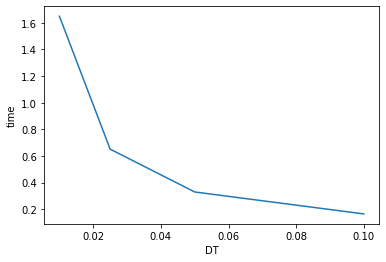

In [53]:
data = get_relate_info(dir="results/dt_increase/", value_name="dt")

ax = sns.lineplot(data=data, x='value', y='time')
ax.set(xlabel='DT', ylabel='time')
plt.show()

# Objects

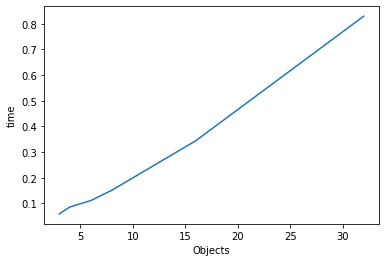

In [54]:
data = get_relate_info(dir="results/obj_increase/", value_name="obj")

ax = sns.lineplot(data=data, x='value', y='time')
ax.set(xlabel='Objects', ylabel='time')
plt.show()

# Threads

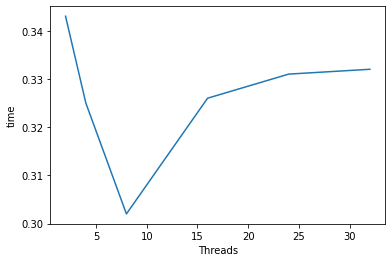

In [57]:
data = get_relate_info(dir="results/threads_increase/", value_name="th")

ax = sns.lineplot(data=data, x='value', y='time')
ax.set(xlabel='Threads', ylabel='time')
plt.show()